In [1]:
#predicting stock market
#importing libraries
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
#Data preparation and downlaoding
#for current data you can go to yahoo finance link for symbol for other stock data
data=yf.Ticker("TATAPOWER.NS")

In [3]:
data=data.history(period="max")

In [4]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-01-01 00:00:00+05:30,6.071525,6.114532,6.023459,6.096823,33160,0.0,0.0
1996-01-02 00:00:00+05:30,6.096824,6.155010,5.975394,6.020930,176162,0.0,0.0
1996-01-03 00:00:00+05:30,6.020929,6.081644,5.972862,5.982982,104661,0.0,0.0
1996-01-04 00:00:00+05:30,5.982982,5.970333,5.848903,5.894439,77718,0.0,0.0
1996-01-05 00:00:00+05:30,5.894439,6.020929,5.818545,6.010810,113469,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-20 00:00:00+05:30,263.850006,264.399994,260.100006,260.850006,4859705,0.0,0.0
2023-11-21 00:00:00+05:30,263.750000,265.399994,260.750000,262.649994,6931541,0.0,0.0
2023-11-22 00:00:00+05:30,263.399994,263.600006,259.250000,262.100006,4537969,0.0,0.0


In [5]:
data.index

DatetimeIndex(['1996-01-01 00:00:00+05:30', '1996-01-02 00:00:00+05:30',
               '1996-01-03 00:00:00+05:30', '1996-01-04 00:00:00+05:30',
               '1996-01-05 00:00:00+05:30', '1996-01-08 00:00:00+05:30',
               '1996-01-09 00:00:00+05:30', '1996-01-10 00:00:00+05:30',
               '1996-01-11 00:00:00+05:30', '1996-01-12 00:00:00+05:30',
               ...
               '2023-11-10 00:00:00+05:30', '2023-11-13 00:00:00+05:30',
               '2023-11-15 00:00:00+05:30', '2023-11-16 00:00:00+05:30',
               '2023-11-17 00:00:00+05:30', '2023-11-20 00:00:00+05:30',
               '2023-11-21 00:00:00+05:30', '2023-11-22 00:00:00+05:30',
               '2023-11-23 00:00:00+05:30', '2023-11-24 00:00:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', name='Date', length=7012, freq=None)

<AxesSubplot:xlabel='Date'>

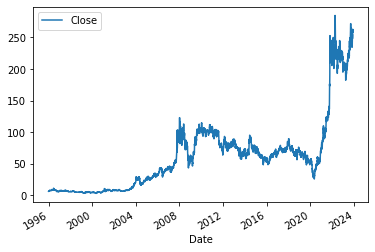

In [6]:
#Cleaning and visualizing ou stock market data
data.plot.line(y='Close',use_index=True)

In [7]:
#remove the extra columns
del data["Dividends"]
del data["Stock Splits"]

In [8]:
#Setting up our target for machine learning
#target:will the stock goes up or down tommorow
data["Tommorow"]=data["Close"].shift(-1)

In [9]:
data

,Open,High,Low,Close,Volume,Tommorow
Date,,,,,,
1996-01-01 00:00:00+05:30,6.071525,6.114532,6.023459,6.096823,33160,6.020930
1996-01-02 00:00:00+05:30,6.096824,6.155010,5.975394,6.020930,176162,5.982982
1996-01-03 00:00:00+05:30,6.020929,6.081644,5.972862,5.982982,104661,5.894439
1996-01-04 00:00:00+05:30,5.982982,5.970333,5.848903,5.894439,77718,6.010810
1996-01-05 00:00:00+05:30,5.894439,6.020929,5.818545,6.010810,113469,6.061406
...,...,...,...,...,...,...
2023-11-20 00:00:00+05:30,263.850006,264.399994,260.100006,260.850006,4859705,262.649994
2023-11-21 00:00:00+05:30,263.750000,265.399994,260.750000,262.649994,6931541,262.100006
2023-11-22 00:00:00+05:30,263.399994,263.600006,259.250000,262.100006,4537969,260.750000


In [10]:
#Creating a target column if tommorows price is greater then todays price
data["Target"]=(data["Tommorow"] > data["Close"]).astype(int)

In [11]:
#target: when 0 price went down, when 1 price went up
data

,Open,High,Low,Close,Volume,Tommorow,Target
Date,,,,,,,
1996-01-01 00:00:00+05:30,6.071525,6.114532,6.023459,6.096823,33160,6.020930,0
1996-01-02 00:00:00+05:30,6.096824,6.155010,5.975394,6.020930,176162,5.982982,0
1996-01-03 00:00:00+05:30,6.020929,6.081644,5.972862,5.982982,104661,5.894439,0
1996-01-04 00:00:00+05:30,5.982982,5.970333,5.848903,5.894439,77718,6.010810,1
1996-01-05 00:00:00+05:30,5.894439,6.020929,5.818545,6.010810,113469,6.061406,1
...,...,...,...,...,...,...,...
2023-11-20 00:00:00+05:30,263.850006,264.399994,260.100006,260.850006,4859705,262.649994,1
2023-11-21 00:00:00+05:30,263.750000,265.399994,260.750000,262.649994,6931541,262.100006,0
2023-11-22 00:00:00+05:30,263.399994,263.600006,259.250000,262.100006,4537969,260.750000,0


In [12]:
#Training an initial Machine Learning model
#RandomForestclassifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=1)
train=data.iloc[:-100]
test=data.iloc[-100:]
predictors=["Close","Volume","Open","High","Low"]
model.fit(train[predictors],train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [13]:
#to check the accuracy of predictions
from sklearn.metrics import precision_score
preds=model.predict(test[predictors])

In [14]:
preds=pd.Series(preds,index=test.index)

In [15]:
preds

Date
2023-07-03 00:00:00+05:30    1
2023-07-04 00:00:00+05:30    1
2023-07-05 00:00:00+05:30    1
2023-07-06 00:00:00+05:30    1
2023-07-07 00:00:00+05:30    0
                            ..
2023-11-20 00:00:00+05:30    0
2023-11-21 00:00:00+05:30    0
2023-11-22 00:00:00+05:30    0
2023-11-23 00:00:00+05:30    0
2023-11-24 00:00:00+05:30    0
Length: 100, dtype: int32

In [16]:
precision_score(test["Target"],preds)

0.5142857142857142

<AxesSubplot:xlabel='Date'>

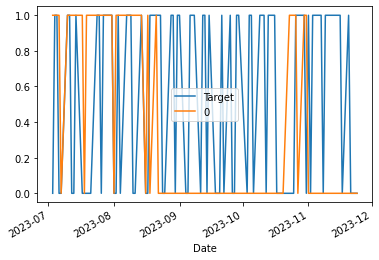

In [17]:
#plot the predictions
#combine actual value with predicted value
combined=pd.concat([test["Target"],preds],axis=1)
combined.plot()

In [18]:
#Building a backtesting system
def predict(train,test,predictors,model):
    model.fit(train[predictors],train["Target"])
    preds=model.predict(test[predictors])
    preds=pd.Series(preds,index=test.index,name="Predictions")
    combined=pd.concat([test["Target"],preds],axis=1)
    return combined

In [19]:
#first 10 years of data and predict the value for 11th years and so on
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [20]:
predictions=backtest(data,model,predictors)

In [21]:
#0 means market will go down and 1 means market will go up
predictions["Predictions"].value_counts()

1    2296
0    2216
Name: Predictions, dtype: int64

In [22]:
precision_score(predictions["Target"],predictions["Predictions"])

0.5104529616724739

In [23]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.503324
0    0.496676
Name: Target, dtype: float64

In [24]:
#Adding additional predictors to our model
horizons=[2,5,60,250,1000]
new_predictors=[]

for horizon in horizons:
    rolling_averages=data.rolling(horizon).mean()
    
    ratio_column=f"Close_Ratio_{horizon}"
    data[ratio_column]= data["Close"] / rolling_averages["Close"]
    
    trend_column=f"Trend_{horizon}"
    data[trend_column]=data.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column,trend_column]

In [25]:
data

,Open,High,Low,Close,Volume,Tommorow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1996-01-01 00:00:00+05:30,6.071525,6.114532,6.023459,6.096823,33160,6.020930,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-02 00:00:00+05:30,6.096824,6.155010,5.975394,6.020930,176162,5.982982,0,0.993737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-03 00:00:00+05:30,6.020929,6.081644,5.972862,5.982982,104661,5.894439,0,0.996839,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-04 00:00:00+05:30,5.982982,5.970333,5.848903,5.894439,77718,6.010810,1,0.992545,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-05 00:00:00+05:30,5.894439,6.020929,5.818545,6.010810,113469,6.061406,1,1.009775,1.0,1.001602,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-20 00:00:00+05:30,263.850006,264.399994,260.100006,260.850006,4859705,262.649994,1,0.996562,1.0,1.001574,4.0,1.027535,35.0,1.177840,138.0,1.712253,547.0
2023-11-21 00:00:00+05:30,263.750000,265.399994,260.750000,262.649994,6931541,262.100006,0,1.003438,1.0,1.004167,4.0,1.033469,35.0,1.185041,139.0,1.721711,548.0
2023-11-22 00:00:00+05:30,263.399994,263.600006,259.250000,262.100006,4537969,260.750000,0,0.998952,1.0,0.999847,3.0,1.030470,34.0,1.181628,139.0,1.715744,548.0


In [26]:
#improving our model
model=RandomForestClassifier(n_estimators=200,min_samples_split=50,random_state=1)

In [27]:
def predict(train,test,predictors,model):
    model.fit(train[predictors],train["Target"])
    preds=model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds=pd.Series(preds,index=test.index,name="Predictions")
    combined=pd.concat([test["Target"],preds],axis=1)
    return combined

In [28]:
predictions=backtest(data,model,predictors)

In [29]:
predictions["Predictions"].value_counts()

0.0    3622
1.0     890
Name: Predictions, dtype: int64

In [30]:
precision_score(predictions["Target"],predictions["Predictions"])

0.5056179775280899

In [31]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.503324
0    0.496676
Name: Target, dtype: float64

In [32]:
predictions

,Target,Predictions
Date,,
2005-08-10 00:00:00+05:30,1,0.0
2005-08-11 00:00:00+05:30,0,0.0
2005-08-12 00:00:00+05:30,0,0.0
2005-08-16 00:00:00+05:30,1,0.0
2005-08-17 00:00:00+05:30,1,0.0
...,...,...
2023-11-20 00:00:00+05:30,1,0.0
2023-11-21 00:00:00+05:30,0,0.0
2023-11-22 00:00:00+05:30,0,0.0
